In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- review of derivates and rates of change. graph example, algebra example
- recall simple diffeq
- look at diffeq without a closed form soln
- re-introduce euler's method
    - solve some equations with euler's?
- look at a simple SIR model

# Simple compartmental model

We'll start by coding up a simple SIR model. We'll assume that we have a fixed population (no births or migration) in which no one dies, everyone recovers, and everyone gains permanent immunity after recovering.

Let's model this as a measles epidemic moving through an entirely susceptible population.

If the average duration for a bout of measles is 14 days, we can say that every day, the change in R is a function of I:

$\frac{dR}{dt} = \frac{1}{14} \cdot I$

How many people move from S to I? Well, let's say each person in S, on average, comes into contact with an individual in I with probability p. Given contact, let's say on average that the susceptible becomes sick with probability q. So, we have S*(qpI) individuals moving from S to I. We will set p=.0004 and q=.25, and then define beta=pq=.0001

$\frac{dS}{dt} = -\beta SI$

Finally, the change in I is a result of the influx from I, beta*S*I, and the individuals who recover into R, 1/14*I:

$\frac{dI}{dt} = \beta SI- \frac{1}{14}\cdot I$

In [129]:
#initialize population
S = 10_000
I = 1
R = 0

#choose beta
beta = .0001

#choose recovery rate
gamma = 1/14

In [130]:
def run_SIR(S, I, R, time_start, step_size, time_stop, trace = None):
    if trace is None:
        trace = pd.DataFrame(data = [[time_start,S,I,R]])
    if time_start < time_stop:
        #calculate rate of change
        dSdt = -beta*S*I
        dIdt = beta*S*I - gamma*I
        dRdt = gamma*I

        #calculate absolute change
        delta_S = dSdt*step_size
        delta_I = dIdt*step_size
        delta_R = dRdt*step_size
    
        #calculate new states
        S, I, R = S + delta_S, I + delta_I, R + delta_R
        
        #save trace
        trace = trace.append([[time_start + step_size, S, I, R]])
        
        #take next step
        trace = run_SIR(S, I, R, time_start + step_size, step_size, time_stop, trace = trace)
    trace.rename(columns={0:'t',1:'S',2:'I',3:'R'}, inplace=True)
    return trace

In [138]:
%%time
model = run_SIR(S, I, R, time_start = 0, step_size = 1, time_stop = 60)

CPU times: user 154 ms, sys: 1.98 ms, total: 156 ms
Wall time: 154 ms


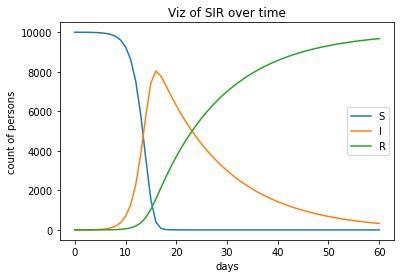

In [139]:
plt.plot(model.t,model.S, label = 'S')
plt.plot(model.t,model.I, label = 'I')
plt.plot(model.t,model.R, label = 'R')

plt.ylabel('count of persons')
plt.xlabel('days')
plt.title('Viz of SIR over time')

plt.legend()
plt.show()